In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#including/reading dataset
df=pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df=df.drop(['Serial No.'],axis=1)

In [5]:
df.keys()

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
#extracting x&y
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
x.shape

(500, 7)

In [7]:
print(x)

[[337.   118.     4.   ...   4.5    9.65   1.  ]
 [324.   107.     4.   ...   4.5    8.87   1.  ]
 [316.   104.     3.   ...   3.5    8.     1.  ]
 ...
 [330.   120.     5.   ...   5.     9.56   1.  ]
 [312.   103.     4.   ...   5.     8.43   0.  ]
 [327.   113.     4.   ...   4.5    9.04   0.  ]]


In [8]:
# split x and y into training and test data
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_tr)
# Apply transform to both the training set and the test set.
x_tr= scaler.transform(x_tr)
x_te = scaler.transform(x_te)

In [10]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(2)

In [11]:
pca.fit(x_tr)

PCA(n_components=2)

In [12]:
x_tr= pca.transform(x_tr)
x_te = pca.transform(x_te)

In [13]:
#creating & training the linear reg model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_tr,y_tr)

LinearRegression()

In [14]:
y_pred = lr.predict(x_te)

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(mean_absolute_error(y_te,y_pred))
mse = mean_squared_error(y_te,y_pred)
print(mse)
print(r2_score(y_te,y_pred))
print(np.sqrt(mse))

0.04636425143166887
0.004173972451334667
0.7958937676608965
0.06460628801699311


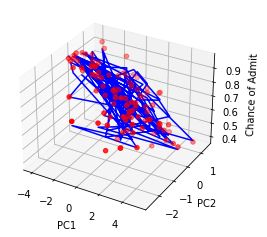

In [16]:
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(x_te[:,0],x_te[:,1],y_te,c='red')
ax.plot3D(x_te[:,0],x_te[:,1],y_pred,c='blue')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Chance of Admit')
plt.show()

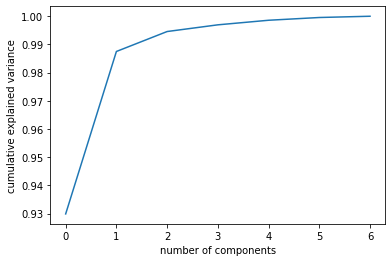

In [17]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()